In [189]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz 

In [190]:
dataset_url = "https://raw.githubusercontent.com/kalyaniuniversity/mgx-datasets/master/DLBCL/datasets/preprocessed/dlbcl-sd-100.csv"

In [191]:
df = pd.read_csv(dataset_url)
df.head()

,X02160_at,D87436_at,U58033_at,X74331_at,U82671_cds2_at,M12959_s_at,S39329_at,Y00285_s_at,U53830_at,U79526_at,...,U25988_at,X92098_at,D89377_s_at,D86043_s_at,D10202_at,X06268_at,HG3364-HT3541_at,U41763_at,M68907_s_at,class
0,0.0860,-0.4776,0.1128,-0.3524,-1.2158,-1.0879,1.2491,-0.5305,-0.4056,-0.0536,...,-0.5577,0.1917,0.6830,0.3797,0.3242,-0.2661,-0.5450,0.2145,-0.0078,DLBCL
1,3.9336,-0.3716,-0.3936,-0.4337,-0.0297,1.5771,-1.7251,0.2726,2.2205,2.3315,...,-0.7781,-1.1437,0.6830,0.8660,0.6778,0.5630,0.3347,-0.4297,0.7316,DLBCL
2,2.1761,0.5697,-0.7987,1.0117,1.1118,2.1945,0.9946,3.2036,0.2055,1.3938,...,0.9939,-0.3984,0.6581,-0.8371,1.8077,0.2269,-0.7039,-2.0157,0.0940,DLBCL
3,0.2475,-0.7456,-0.5455,-0.5692,-0.2692,0.7490,-1.8189,0.4398,0.1410,0.1095,...,-0.7713,-0.7283,0.1969,1.1079,0.4049,-0.0700,1.6608,-0.4428,0.3789,DLBCL
4,0.5040,1.6793,-1.9128,0.0541,-0.9875,-1.4499,0.5927,1.2276,-0.1220,-0.7263,...,-0.6645,-1.0156,-0.5011,-1.0720,-0.2408,0.1541,1.1423,0.7017,-0.0417,DLBCL


In [1]:
df.shape

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Columns: 101 entries, X02160_at to class
dtypes: float64(100), object(1)
memory usage: 60.9+ KB


In [194]:
df['class'].value_counts()

DLBCL    58
FL       19
Name: class, dtype: int64

In [195]:
X = df.drop(['class'], axis=1)

y = df['class']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [197]:
X_train.shape, X_test.shape

((46, 100), (31, 100))

## Decision Tree Classifier with Gini Index

In [198]:
clf_gini = DecisionTreeClassifier(criterion="gini",
                                  max_depth=5,
                                  min_samples_leaf=6,
                                  random_state=0)



clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=0)

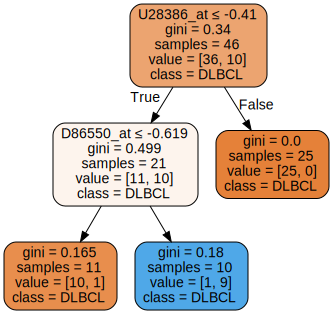

In [199]:

dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [200]:
y_pred_gini = clf_gini.predict(X_test)

In [201]:
acc_score = accuracy_score(y_test, y_pred_gini)
acc_score

0.8387096774193549

In [202]:
print(f'Training set score: {clf_gini.score(X_train, y_train):.4f}')

print(f'Test set score: {clf_gini.score(X_test, y_test):.4f}')

Training set score: 0.9565
Test set score: 0.8387


In [203]:
confusion_matrix(y_test, y_pred_gini)

array([[21,  1],
       [ 4,  5]])

## Decision Tree Classifier with Entropy

In [204]:
clf_en = DecisionTreeClassifier(criterion='entropy',
                                max_depth=5,
                                random_state=10,
                                min_samples_leaf=6)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=6,
                       random_state=10)

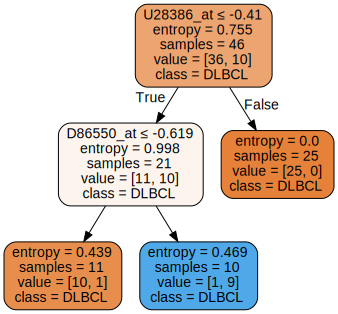

In [205]:
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [206]:
y_pred_en = clf_en.predict(X_test)

In [207]:
acc_score = accuracy_score(y_test, y_pred_en)
acc_score

0.8387096774193549

In [208]:
print(f'Training set score: {clf_en.score(X_train, y_train):.4f}')

print(f'Test set score: {clf_en.score(X_test, y_test):.4f}')

Training set score: 0.9565
Test set score: 0.8387


In [209]:
confusion_matrix(y_test, y_pred_en)

array([[21,  1],
       [ 4,  5]])

# SVM

In [210]:
df = pd.read_csv(dataset_url)
df.head()


X = df.drop(['class'], axis=1)

y = df['class']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)

In [212]:
# import SVC classifier
from sklearn.svm import SVC

linear_svc=SVC(kernel='linear', C=1) 

linear_svc.fit(X_train,y_train)

y_pred_svm = linear_svc.predict(X_test)
 

In [213]:
accuracy_score(y_test, y_pred_svm)

0.8709677419354839

In [214]:
# check overfitting

print(f'Training set score: {linear_svc.score(X_train, y_train):.4f}')

print(f'Test set score: {linear_svc.score(X_test, y_test):.4f}')

Training set score: 1.0000
Test set score: 0.8710


In [215]:
confusion_matrix(y_test, y_pred_svm)

array([[20,  3],
       [ 1,  7]])